<a href="https://colab.research.google.com/github/ishantmr/learning/blob/main/autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Derivatives

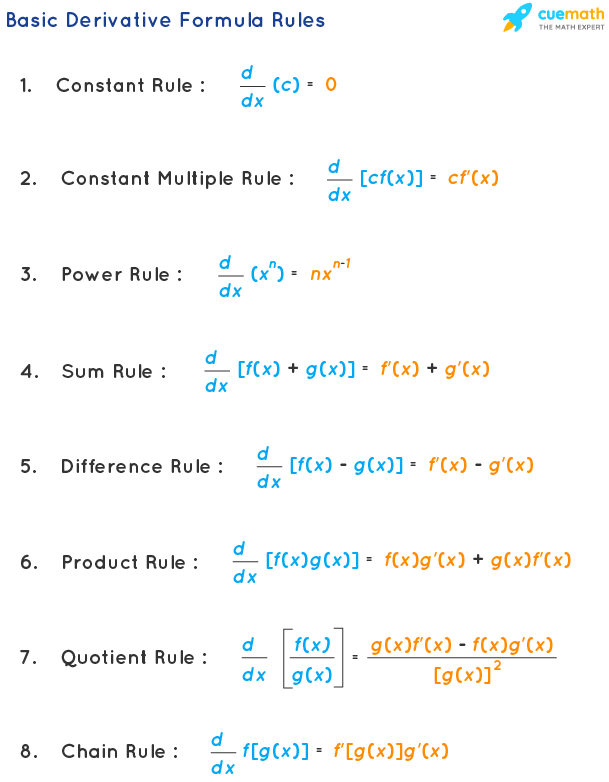

So if y = x**2

dy/dx = d/dx(x**2) = 2x^(2-1) = 2x^(1) = 2x



In [ ]:
def dy_dx(x):
  return 2*x

In [ ]:
dy_dx(3)

6

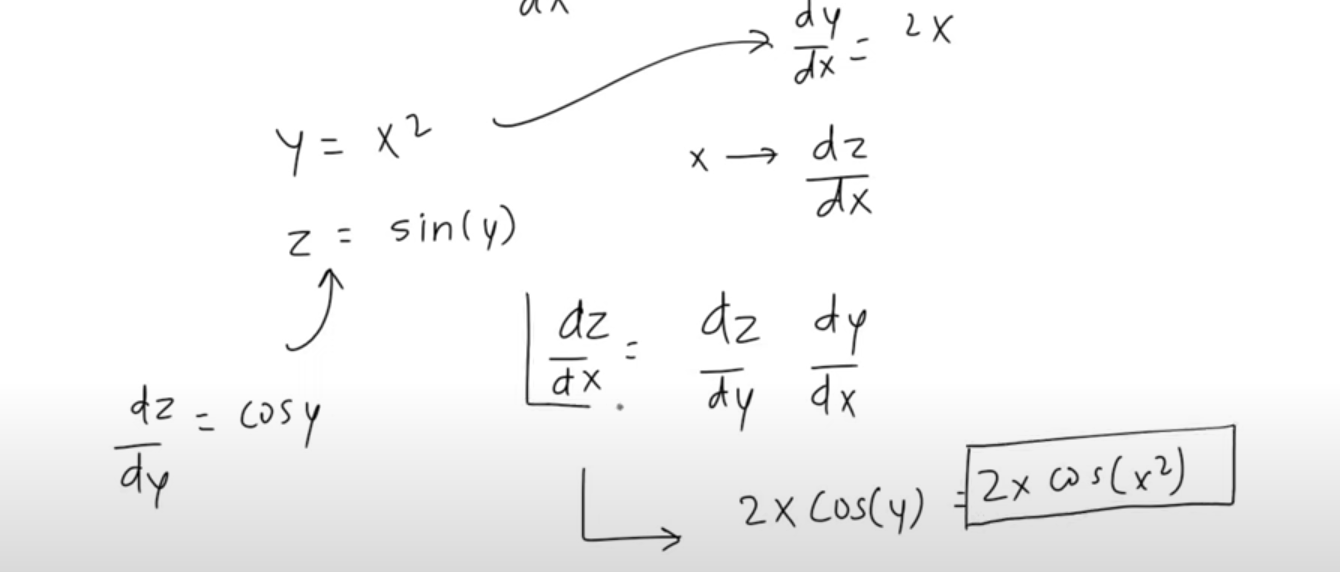

In [ ]:
import math

In [ ]:
def dz_dx(x):
  return 2 * x * math.cos(x**2)

In [ ]:
dz_dx(3)

-5.466781571308061

Jaise Jaise nested functions become more complex, derivative will be more tough

Basic Neural Network

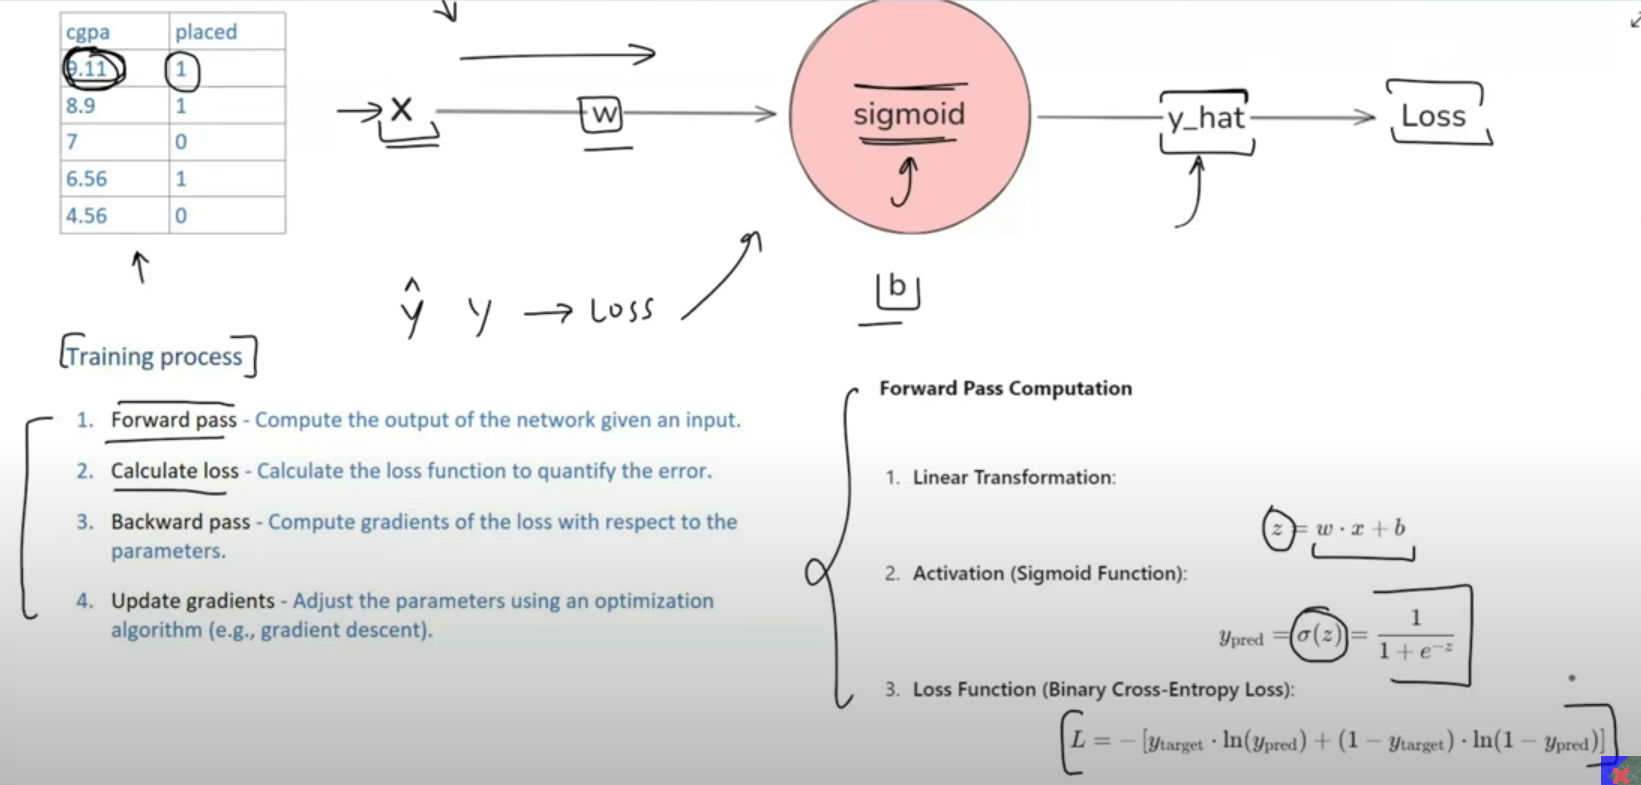

Backward pass
![image.png](data:image/png;base64,)
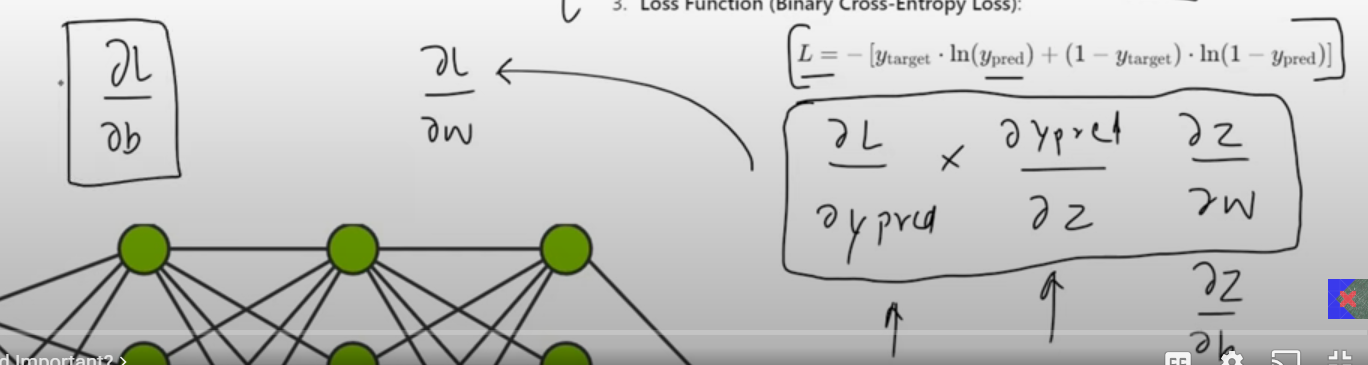

Agar ek simple neuron ke saath calculations are so tough to socho with so many neurons as shown below, how will we calculate? manually?

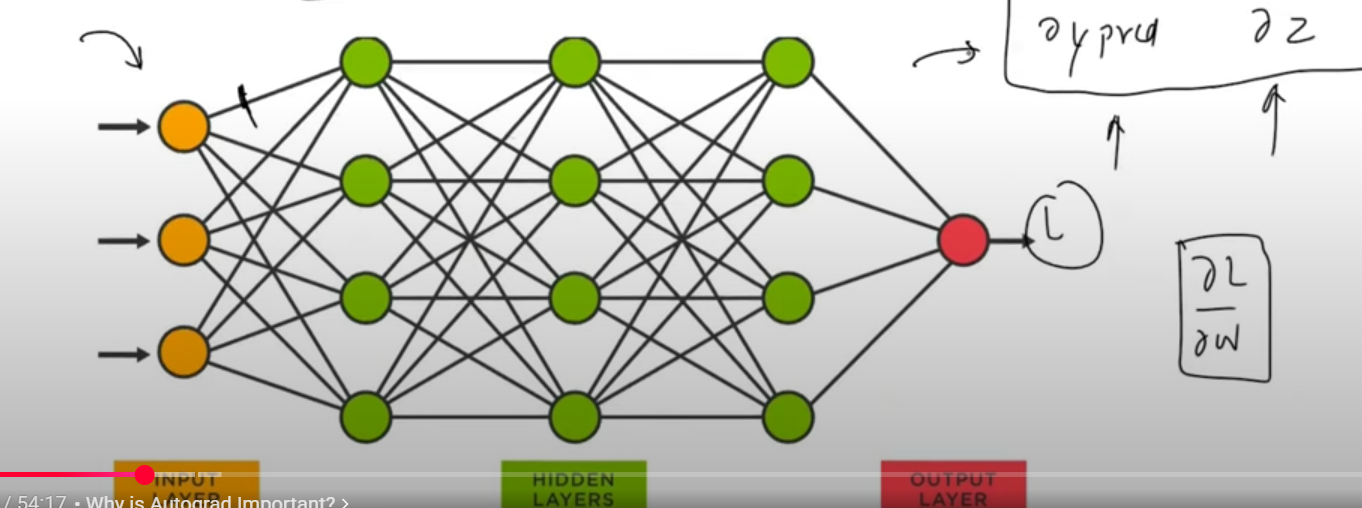

# Autograd

In [1]:
import torch

kabhi bhi kisi derivative ka derivate chahiye to set requires_grad=True while creating

In [ ]:
x = torch.tensor(3.0, requires_grad=True)
x

tensor(3., requires_grad=True)

In [ ]:
y = x ** 2
y

tensor(9., grad_fn=<PowBackward0>)

To calculate Derivate, run 2 commands, y.backward, to see the result run x.grad

In [ ]:
y.backward()

In [ ]:
x.grad

tensor(6.)

In [ ]:
x = torch.tensor(3.0, requires_grad=True)
x

tensor(3., requires_grad=True)

In [ ]:
y = x ** 2
y

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
z = torch.sin(y)
z

tensor(0.4121, grad_fn=<SinBackward0>)

In [ ]:
z.backward()

In [ ]:
x.grad

tensor(-5.4668)

In [ ]:
y.grad

/tmp/ipython-input-20-486760323.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  y.grad


Computational graph banta hai (DAG - Directed Acyclic Graph) how it runs
Root node (z) (output) aur leaf node (x) (input) aur intermediate nodes (beach ke) (y)
No gradients calculated for intermediate nodes

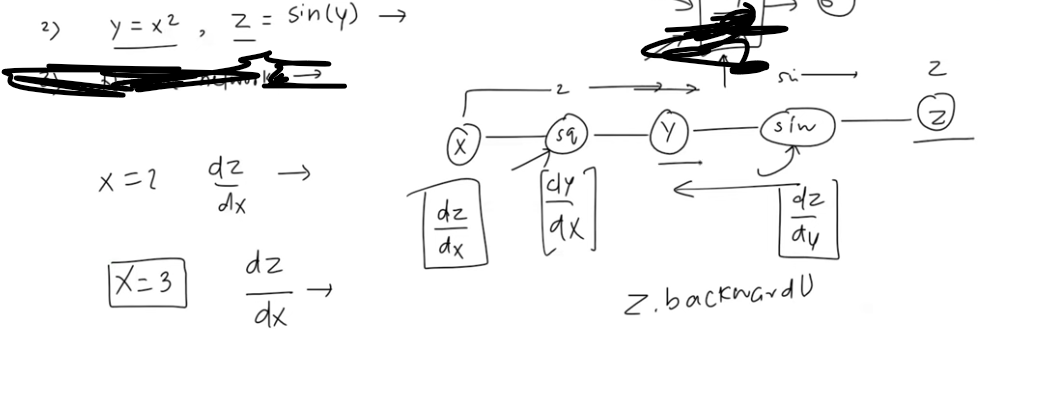

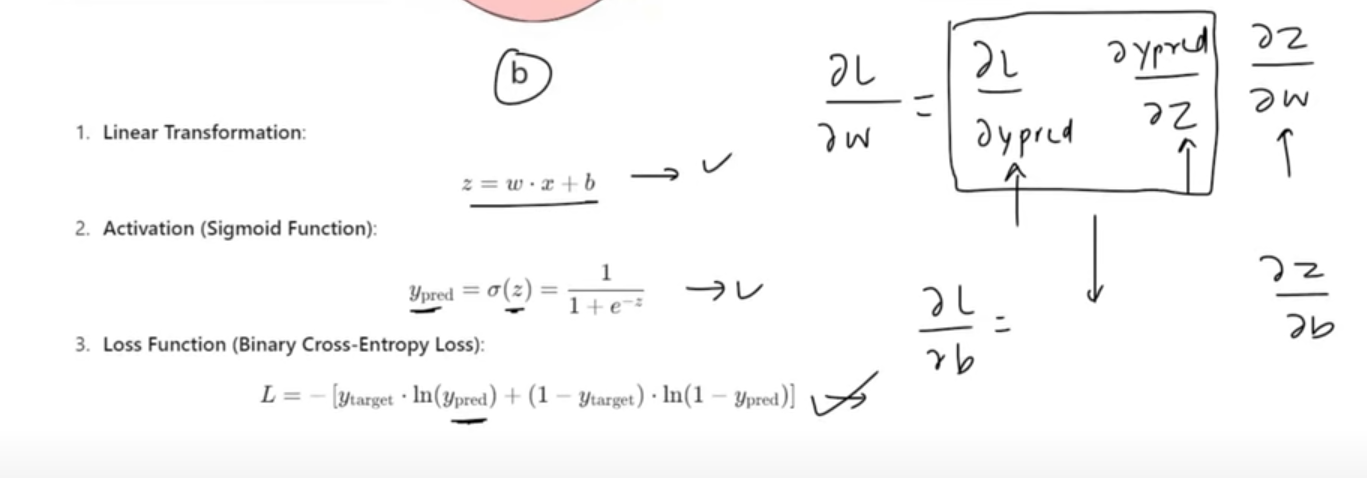

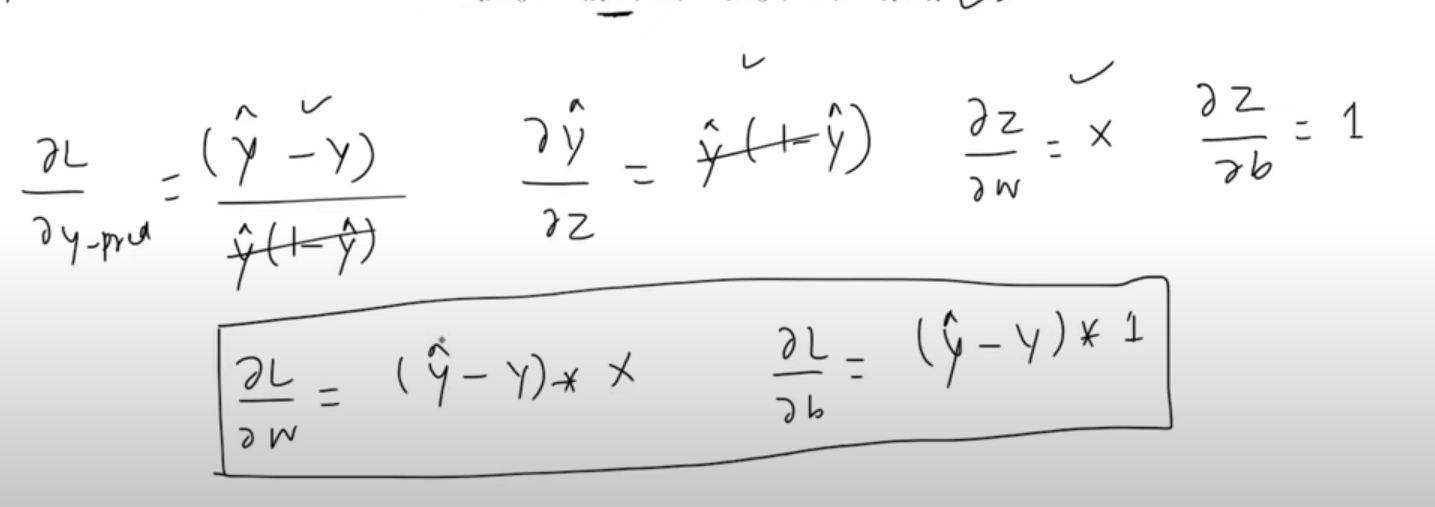

In [4]:
x = torch.tensor(6.7) # Input feature
y = torch.tensor(0.0) # True label (binary)

w = torch.tensor(1.0) # weight
b = torch.tensor(0.0) # bias

In [5]:
# Binary Cross-Entropy Loss for scalar
def binary_cross_entropy_loss(prediction, target):
    epsilon = 1e-8  # To prevent log(0)
    prediction = torch.clamp(prediction, epsilon, 1 - epsilon)
    return -(target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction))

In [8]:
# Forward pass
z = w * x + b  # Weighted sum (linear part)
y_pred = torch.sigmoid(z)  # Predicted probability

# Compute binary cross-entropy loss
loss = binary_cross_entropy_loss(y_pred, y)
loss

tensor(6.7012)

In [10]:
# Derivatives:
# 1. dL/d(y_pred): Loss with respect to the prediction (y_pred)
dloss_dy_pred = (y_pred - y)/(y_pred*(1-y_pred))

# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x  # dz/dw = x
dz_db = 1  # dz/db = 1 (bias contributes directly to z)

dL_dw = dloss_dy_pred * dy_pred_dz * dz_dw
dL_db = dloss_dy_pred * dy_pred_dz * dz_db

In [11]:
print(f"Manual Gradient of loss w.r.t weight (dw): {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

Manual Gradient of loss w.r.t weight (dw): 6.691762447357178
Manual Gradient of loss w.r.t bias (db): 0.998770534992218


Ab ye hai aam zindagi where we calculated derivatives manually and will become more lengthy for more neural networks

Ab dekhte hai mentos zindagi with autograd

In [12]:
x = torch.tensor(6.7)
y = torch.tensor(0.0)

In [13]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

In [14]:
w

tensor(1., requires_grad=True)

In [15]:
b

tensor(0., requires_grad=True)

In [16]:
z = w*x + b
z

tensor(6.7000, grad_fn=<AddBackward0>)

In [17]:
y_pred = torch.sigmoid(z)
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [18]:
loss = binary_cross_entropy_loss(y_pred, y)
loss

tensor(6.7012, grad_fn=<NegBackward0>)

In [19]:
loss.backward()

In [20]:
print(f"Auto Gradient of loss w.r.t weight (dw): {w.grad}")
print(f"Auto Gradient of loss w.r.t bias (db): {b.grad}")

Auto Gradient of loss w.r.t weight (dw): 6.6917619705200195
Auto Gradient of loss w.r.t bias (db): 0.9987704753875732


Lets do for a vector instead of scaler

In [22]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
x

tensor([1., 2., 3.], requires_grad=True)

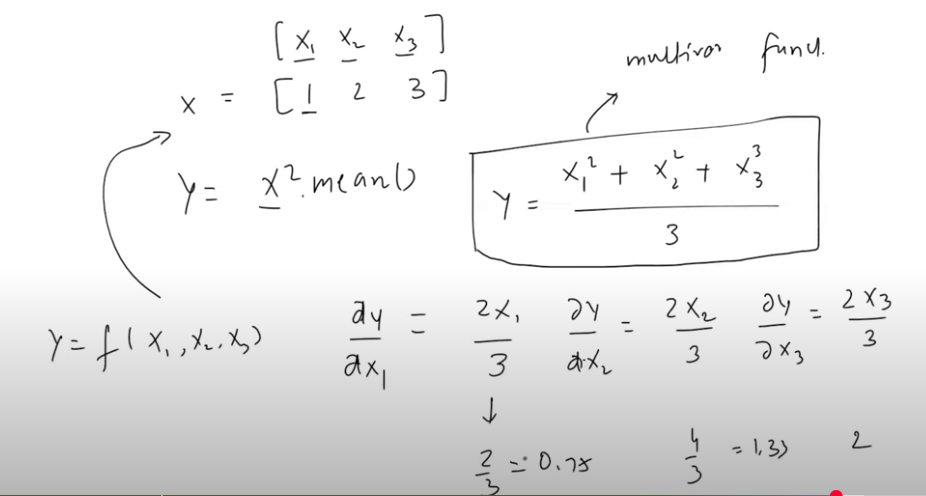

2/3 is .66 not .75

In [26]:
y = (x ** 2).mean()
y

tensor(4.6667, grad_fn=<MeanBackward0>)

In [27]:
y.backward()

In [29]:
x.grad

tensor([0.6667, 1.3333, 2.0000])

If we run backward again and again, so many gradients gets accumulated (does not clears by itself) so we need to clear them

run below example twice to see first grad is 4 and second time 8

In [31]:
# clearing grad
x = torch.tensor(2.0, requires_grad = True)
x

tensor(2., requires_grad=True)

In [44]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [45]:
y.backward()

In [46]:
x.grad

tensor(4.)

inplace changes to grad and set to zero

In [43]:
x.grad.zero_()

tensor(0.)

We can disable gradient tracking as well.
In situations, we dont have to do calculate gradients

Eg: While training a NN, we need to calculate derivative so grad tracking on
but once it is trained, we need to use it now and just predict, we can turn off tracking now

In [47]:
#option 1 - requires_grad_(False)
# option 2 - detach()
# opiton 3 - torch.no_grad()


In [48]:
x.requires_grad_(False)
x

tensor(2.)

In [50]:
y = x ** 2
y

tensor(4.)

In [51]:
y.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [52]:
x = torch.tensor(2.0, requires_grad = True)
x

tensor(2., requires_grad=True)

In [53]:
z = x.detach()
z

In [54]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [55]:
y1 = z ** 2
y1

tensor(4.)

In [56]:
y.backward()

In [57]:
y1.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [58]:
x = torch.tensor(2.0, requires_grad = True)
x

tensor(2., requires_grad=True)

In [59]:
with torch.no_grad():
  y = x ** 2
y

tensor(4.)

In [60]:
y.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn